In [66]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sb

SchoolProfile_filename = '../../SchoolData/data_2015_school_profile.csv'
data = pd.read_csv(SchoolProfile_filename, header= 0)

SchoolGrad_Absences_filename = '../../SchoolData/data_2015_School-Attendance-and-Graduation.csv'
SchoolGrad_Absences_data = pd.read_csv(SchoolGrad_Absences_filename, header= 0)

In [67]:
dataFields = SchoolGrad_Absences_data.columns.values.tolist()
#dataFields

In [68]:
JoinedData = data.merge(SchoolGrad_Absences_data, left_on=['SCHOOL_ID','DISTRICT'], right_on=['SCHOOL_ID','DISTRICT'])

JoinedData['ALL_GRAD_COUNT'] = JoinedData['ALL_GRAD_RATE']*JoinedData['TOTAL']/100

School_Profile_Groups = []

#JoinedData[['SCHOOL_NAME_x','SCHOOL_NAME_y']]

In [69]:
JoinedData.to_csv('../../SchoolData/JoinedData_2015.csv')

JoinedDataFields = JoinedData.columns.values.tolist()
#JoinedDataFields
#set(JoinedData.GRADES_SERVED)
#JoinedData.groupby(['GRADES_SERVED']).get_group('Grades 9-12').TOTAL.sum()
#JoinedData.query('GRADES_SERVED == "Grades 9-12"').TOTAL.sum()

In [29]:
def printSummary(query, label):
    student_count = 0
    white_student_count = 0
    black_student_count = 0
    hispanic_student_count = 0
    disabled_student_count = 0
    economically_disadvantaged_student_count = 0
    limited_english_proficiency_student_count = 0
    graduate_count = 0
    label_no_spaces = label.replace(' ', '_')
    
    gb = JoinedData.query(query)
    student_count = gb.TOTAL.sum()
    white_student_count = gb.WHITE.sum()
    black_student_count = gb.AFRICAN_AMERICAN.sum()
    hispanic_student_count = gb.HISPANIC.sum()
    disabled_student_count = gb.STUDENTS_WITH_DISABILITIES.sum()
    economically_disadvantaged_student_count = gb.ECONOMICALLY_DISADVANTAGED.sum()
    limited_english_proficiency_student_count = gb.LIMITED_ENGLISH_PROFICIENT.sum()
    graduate_count = gb.ALL_GRAD_COUNT.sum()
    graduation_pct = (graduate_count/student_count)*100           
    School_Profile_Groups.append({'name': label_no_spaces, 
                                  'students': student_count, 
                                  'white_students': white_student_count, 
                                  'black_students': black_student_count, 
                                  'hispanic_students': hispanic_student_count, 
                                  'disabled_students': disabled_student_count, 
                                  'economically_disadvantaged_students': economically_disadvantaged_student_count, 
                                  'limited_english_proficiency_students': limited_english_proficiency_student_count, 
                                  'graduation_pct': graduation_pct})

    print(label)
    print('All Students: ' + str(int(student_count)))
    print('White Students: ' + str(int(white_student_count)))
    print('Black Students: ' + str(int(black_student_count)))
    print('Hispanic Students: ' + str(int(hispanic_student_count)))

    print('Students with Disabilities: ' + str(int(disabled_student_count)))
    print('Economically Disadvantaged Students: ' + str(int(economically_disadvantaged_student_count)))
    print('Students with Limited English Proficiency: ' + str(int(limited_english_proficiency_student_count)))
    print('Student Graduation percentage: ' + str(int(graduation_pct)))
    print('Query used:', query)

In [30]:
printSummary('GRADES_SERVED == "Grades 9-12"', 'All TN High Schools')

All TN High Schools
All Students: 256232
White Students: 170475
Black Students: 62239
Hispanic Students: 17268
Students with Disabilities: 30602
Economically Disadvantaged Students: 130166
Students with Limited English Proficiency: 5369
Student Graduation percentage: 88
Query used: GRADES_SERVED == "Grades 9-12"


In [31]:
def printHSSummary(query, label):
    printSummary(query + " and GRADES_SERVED == 'Grades 9-12'", label)
    
printHSSummary("DISTRICT_NAME_x in ('Davidson County', 'Shelby County', 'Knox County', 'Hamilton County')", 
             'TN Urban High Schools')

TN Urban High Schools
All Students: 75150
White Students: 26464
Black Students: 38774
Hispanic Students: 7623
Students with Disabilities: 9025
Economically Disadvantaged Students: 46889
Students with Limited English Proficiency: 3646
Student Graduation percentage: 81
Query used: DISTRICT_NAME_x in ('Davidson County', 'Shelby County', 'Knox County', 'Hamilton County') and GRADES_SERVED == 'Grades 9-12'


In [32]:
def printHSRangeSummary(fieldName, low, high, fieldLabel):
    if high == 100:
        high1 = 101
    else:
        high1 = high
    printHSSummary(str(low) + " <= " + fieldName + " and " + fieldName + " < " + str(high1), 
             'TN High Schools with ' + str(low) + '-' + str(high) + fieldLabel)

def printHSRacialSummary(low, high):
    printHSRangeSummary('WHITE_PCT', low, high, '% White Students')
    
printHSRacialSummary(0, 25)

TN High Schools with 0-25% White Students
All Students: 35859
White Students: 3265
Black Students: 27605
Hispanic Students: 4296
Students with Disabilities: 4814
Economically Disadvantaged Students: 28579
Students with Limited English Proficiency: 2142
Student Graduation percentage: 74
Query used: 0 <= WHITE_PCT and WHITE_PCT < 25 and GRADES_SERVED == 'Grades 9-12'


In [33]:
printHSRacialSummary(25, 50)

TN High Schools with 25-50% White Students
All Students: 26335
White Students: 9668
Black Students: 12130
Hispanic Students: 3336
Students with Disabilities: 3029
Economically Disadvantaged Students: 16398
Students with Limited English Proficiency: 1438
Student Graduation percentage: 86
Query used: 25 <= WHITE_PCT and WHITE_PCT < 50 and GRADES_SERVED == 'Grades 9-12'


In [34]:
printHSRacialSummary(50, 75)

TN High Schools with 50-75% White Students
All Students: 50252
White Students: 33138
Black Students: 11133
Hispanic Students: 4033
Students with Disabilities: 5751
Economically Disadvantaged Students: 19509
Students with Limited English Proficiency: 891
Student Graduation percentage: 91
Query used: 50 <= WHITE_PCT and WHITE_PCT < 75 and GRADES_SERVED == 'Grades 9-12'


In [35]:
printHSRacialSummary(75, 100)

TN High Schools with 75-100% White Students
All Students: 139836
White Students: 124404
Black Students: 7445
Hispanic Students: 5583
Students with Disabilities: 16537
Economically Disadvantaged Students: 62403
Students with Limited English Proficiency: 890
Student Graduation percentage: 92
Query used: 75 <= WHITE_PCT and WHITE_PCT < 101 and GRADES_SERVED == 'Grades 9-12'


In [36]:
def printHSEconSummary(low, high):
    printHSRangeSummary('ECONOMICALLY_DISADVANTAGED_PCT', low, high, '% Economically Disadvantaged Students')
    
printHSEconSummary(0, 25)

TN High Schools with 0-25% Economically Disadvantaged Students
All Students: 34225
White Students: 27056
Black Students: 3653
Hispanic Students: 1795
Students with Disabilities: 3300
Economically Disadvantaged Students: 5170
Students with Limited English Proficiency: 333
Student Graduation percentage: 94
Query used: 0 <= ECONOMICALLY_DISADVANTAGED_PCT and ECONOMICALLY_DISADVANTAGED_PCT < 25 and GRADES_SERVED == 'Grades 9-12'


In [37]:
printHSEconSummary(25, 50)

TN High Schools with 25-50% Economically Disadvantaged Students
All Students: 82203
White Students: 64434
Black Students: 11402
Hispanic Students: 4334
Students with Disabilities: 9492
Economically Disadvantaged Students: 32132
Students with Limited English Proficiency: 887
Student Graduation percentage: 92
Query used: 25 <= ECONOMICALLY_DISADVANTAGED_PCT and ECONOMICALLY_DISADVANTAGED_PCT < 50 and GRADES_SERVED == 'Grades 9-12'


In [38]:
printHSEconSummary(50, 75)

TN High Schools with 50-75% Economically Disadvantaged Students
All Students: 103131
White Students: 72023
Black Students: 21289
Hispanic Students: 7785
Students with Disabilities: 12578
Economically Disadvantaged Students: 61511
Students with Limited English Proficiency: 2409
Student Graduation percentage: 87
Query used: 50 <= ECONOMICALLY_DISADVANTAGED_PCT and ECONOMICALLY_DISADVANTAGED_PCT < 75 and GRADES_SERVED == 'Grades 9-12'


In [39]:
printHSEconSummary(75, 100)

TN High Schools with 75-100% Economically Disadvantaged Students
All Students: 36583
White Students: 6901
Black Students: 25872
Hispanic Students: 3348
Students with Disabilities: 5151
Economically Disadvantaged Students: 31353
Students with Limited English Proficiency: 1740
Student Graduation percentage: 77
Query used: 75 <= ECONOMICALLY_DISADVANTAGED_PCT and ECONOMICALLY_DISADVANTAGED_PCT < 101 and GRADES_SERVED == 'Grades 9-12'


In [40]:
groupData = pd.DataFrame(School_Profile_Groups)
groupData = groupData[['name','students', 'white_students','black_students','hispanic_students', 'disabled_students', 'economically_disadvantaged_students',  
                       'limited_english_proficiency_students','graduation_pct']]
groupData

,name,students,white_students,black_students,hispanic_students,disabled_students,economically_disadvantaged_students,limited_english_proficiency_students,graduation_pct
0,All_TN_High_Schools,256232.0,170475.0,62239.0,17268.0,30602.0,130166.0,5369.0,88.693192
1,TN_Urban_High_Schools,75150.0,26464.0,38774.0,7623.0,9025.0,46889.0,3646.0,81.178711
2,TN_High_Schools_with_0-25%_White_Students,35859.0,3265.0,27605.0,4296.0,4814.0,28579.0,2142.0,74.780959
3,TN_High_Schools_with_25-50%_White_Students,26335.0,9668.0,12130.0,3336.0,3029.0,16398.0,1438.0,86.646307
4,TN_High_Schools_with_50-75%_White_Students,50252.0,33138.0,11133.0,4033.0,5751.0,19509.0,891.0,91.088014
5,TN_High_Schools_with_75-100%_White_Students,139836.0,124404.0,7445.0,5583.0,16537.0,62403.0,890.0,92.040735
6,TN_High_Schools_with_0-25%_Economically_Disadv...,34225.0,27056.0,3653.0,1795.0,3300.0,5170.0,333.0,94.659527
7,TN_High_Schools_with_25-50%_Economically_Disad...,82203.0,64434.0,11402.0,4334.0,9492.0,32132.0,887.0,92.236265
8,TN_High_Schools_with_50-75%_Economically_Disad...,103131.0,72023.0,21289.0,7785.0,12578.0,61511.0,2409.0,87.848604
9,TN_High_Schools_with_75-100%_Economically_Disa...,36583.0,6901.0,25872.0,3348.0,5151.0,31353.0,1740.0,77.562499


In [41]:
def GradPctPie(row):
    labels = [groupData.name[row],'']
    sizes = [groupData.graduation_pct[row], 100 - groupData.graduation_pct[row]]
    colors = ['yellowgreen', 'gold']
    explode = (0, 0.1)  

    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=90)
    # Set aspect ratio to be equal so that pie is drawn as a circle.
    plt.axis('equal')
    print('Graduation Percentage:')
    plt.show()

Graduation Percentage:


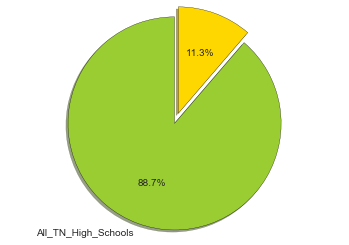

Graduation Percentage:


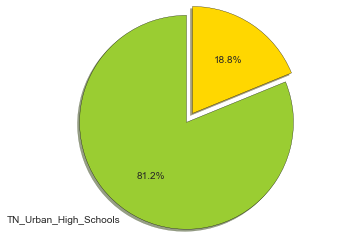

Graduation Percentage:


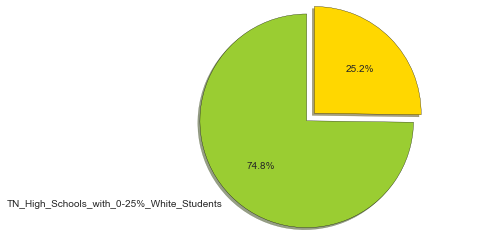

Graduation Percentage:


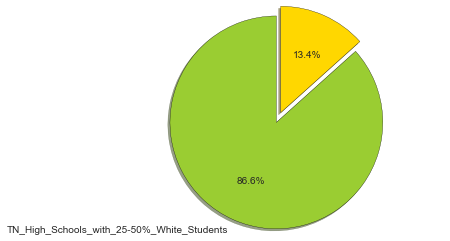

Graduation Percentage:


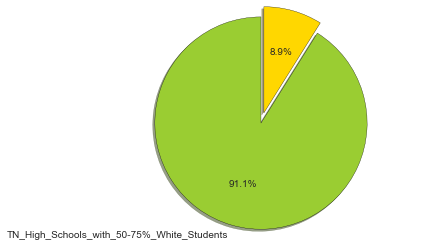

Graduation Percentage:


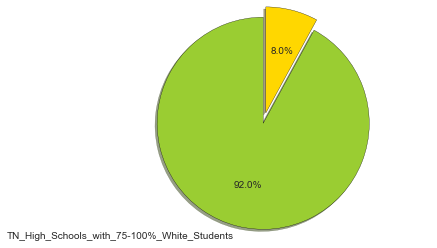

Graduation Percentage:


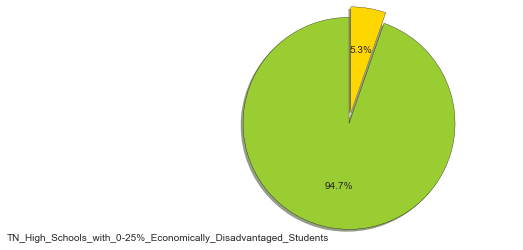

Graduation Percentage:


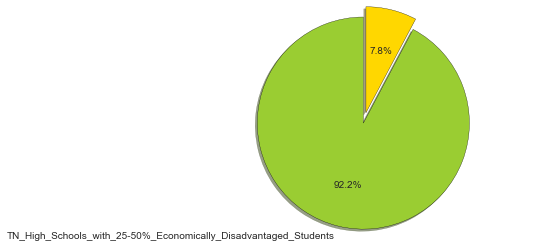

Graduation Percentage:


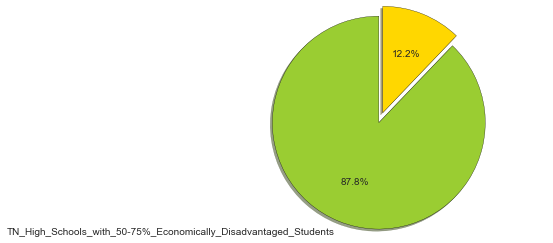

Graduation Percentage:


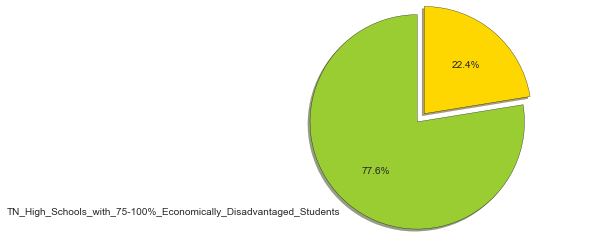

In [42]:
for i in range (0,10):
    GradPctPie(i)

In [72]:
JoinedData_Prepared_filename = '../../SchoolData/JoinedData_2015_Prepared.csv'
JDP = pd.read_csv(JoinedData_Prepared_filename, header= 0)



In [73]:
#numerical_JoinedData = gb._get_numeric_data()

# put the numeric column names in a python list
#numeric_headers = list(numerical_JoinedData.columns.values)

# create a numpy array with the numeric values for input into scikit-learn
dataset = JDP.as_matrix()

#numerical_JoinedData


In [76]:
JDPFields = JDP.columns.values.tolist()
print(JDPFields)
print(len(JDPFields))

['AVERAGE_DAILY_MEMBERSHIP', 'TOTAL', 'WHITE', 'AFRICAN_AMERICAN', 'HISPANIC', 'ASIAN', 'NATIVE_AMERICAN', 'HAWAIIAN_PACISLD', 'MALE', 'FEMALE', 'WHITE_PCT', 'AFRICAN_AMERICAN_PCT', 'HISPANIC_PCT', 'ASIAN_PCT', 'NATIVE_AMERICAN_PCT', 'HAWAIIAN_PACISLD_PCT', 'MALE_PCT', 'FEMALE_PCT', 'WHITE_MALE', 'AFRICAN_AMERICAN_MALE', 'HISPANIC_MALE', 'ASIAN_MALE', 'NATIVE_AMERICAN_MALE', 'HAWAIIAN_PACISLD_MALE', 'WHITE_FEMALE', 'AFRICAN_AMERICAN_FEMALE', 'HISPANIC_FEMALE', 'ASIAN_FEMALE', 'NATIVE_AMERICAN_FEMALE', 'HAWAIIAN_PACISLD_FEMALE', 'LIMITED_ENGLISH_PROFICIENT_PCT', 'LIMITED_ENGLISH_PROFICIENT', 'STUDENTS_WITH_DISABILITIES', 'STUDENTS_WITH_DISABILITIES_PCT', 'ECONOMICALLY_DISADVANTAGED', 'ECONOMICALLY_DISADVANTAGED_PCT', 'ATTENDANCE_RATE_PCT', 'COHORT_DROPOUT__PCT', 'GRADUATION_RATE_NCLB_PCT', 'EVENT_DROPOUT_PCT', 'WHITE_GRAD_RATE', 'AFRICAN_AMERICAN_GRAD_RATE', 'HISPANIC_GRAD_RATE', 'ASIAN_GRAD_RATE', 'NATIVE_AMERICAN_GRAD_RATE', 'HAWAIIAN_PACISLD_GRAD_RATE', 'MALE_GRAD_RATE', 'FEMALE_GRAD

In [77]:
#dataset_test = np.loadtxt(dataset, delimiter=",")
# separate the data from the target attributes
X = dataset[:,0:52]
y = np.asarray(dataset[:,52],dtype="int64")

In [78]:
#from sklearn import preprocessing
# normalize the data attributes
#normalized_X = preprocessing.normalize(X)
# standardize the data attributes
#standardized_X = preprocessing.scale(X)

In [80]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 1)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False]
[23 11 44 45  8 41 40 42 21 34 25 16 36 50 51 52  3  2 37 20  7 32 43 49 29
 18 38 30 39 47 48 19  9 27 24 13 12  1 46 35 17 33 15 28 31 26  4  5  6 14
 22 10]
